<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: Loan Application Status </span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df1=df.copy()

In [7]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df1.shape

(614, 13)

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


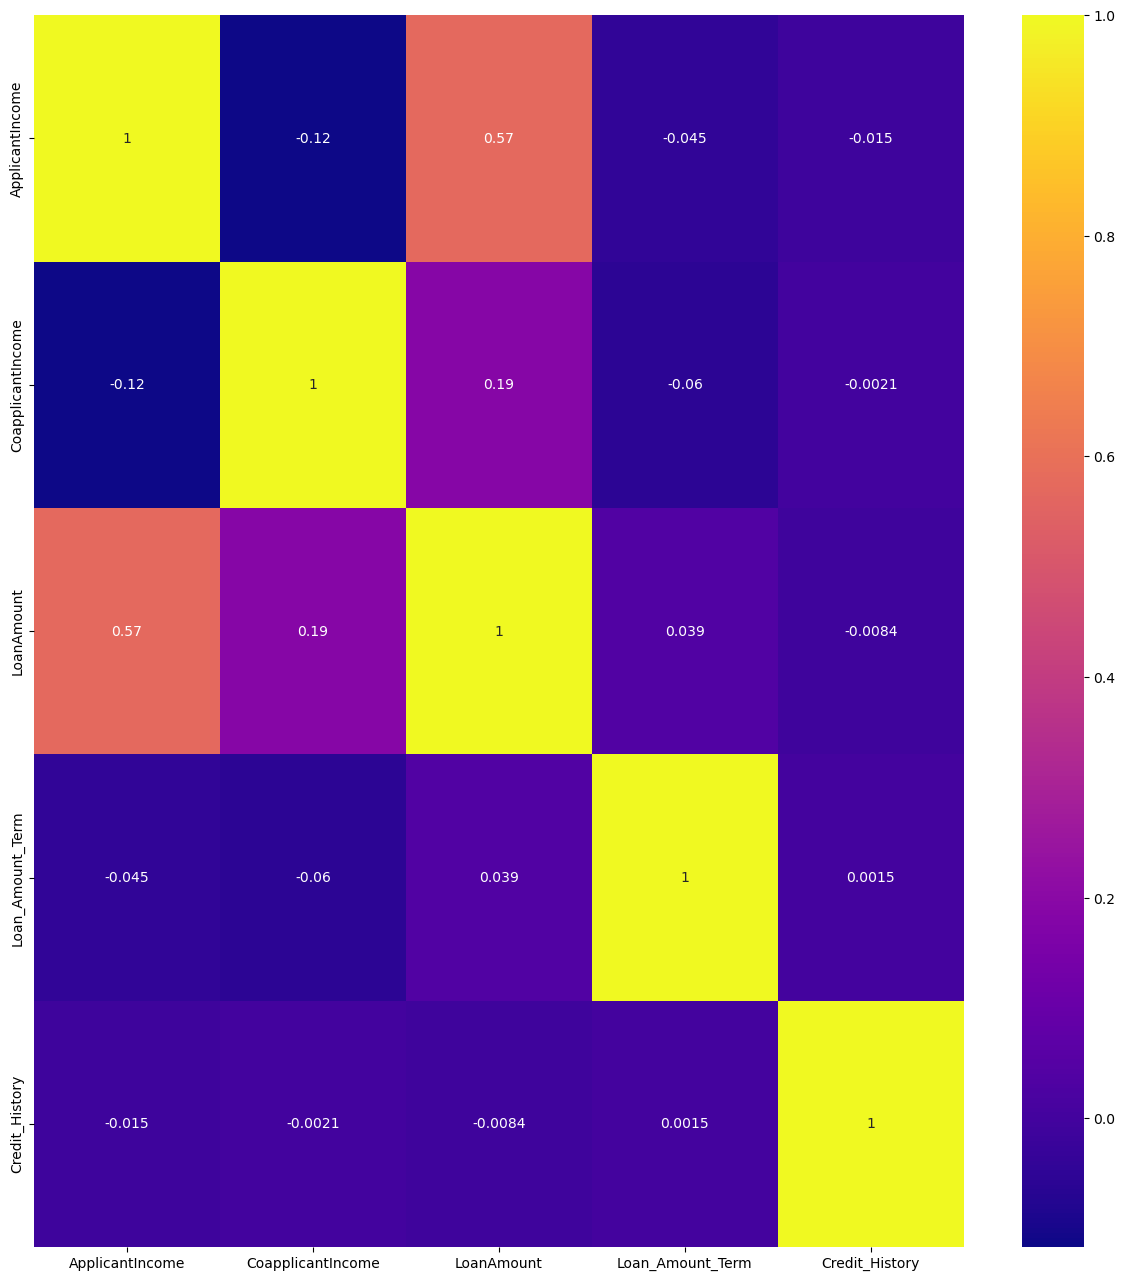

In [17]:
plt.figure(figsize=(15,16), facecolor='w')
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

In [18]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">IMPUTATION</span>

In [19]:
df1.fillna(df1.mode().iloc[0], inplace=True)


In [20]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION COUNTPLOT: TARGET VS INPUTS DATASET</span>

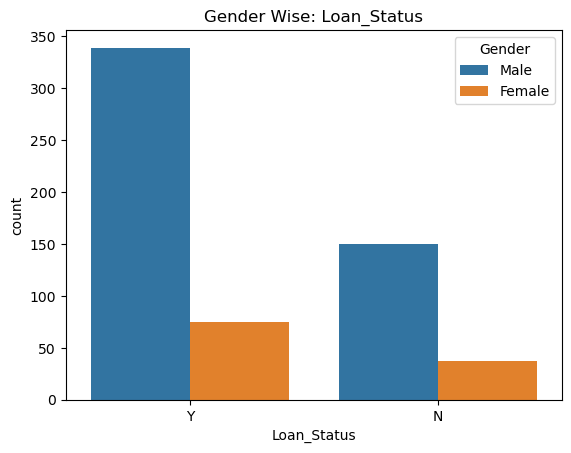

In [22]:
sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.title('Gender Wise: Loan_Status')
plt.show()

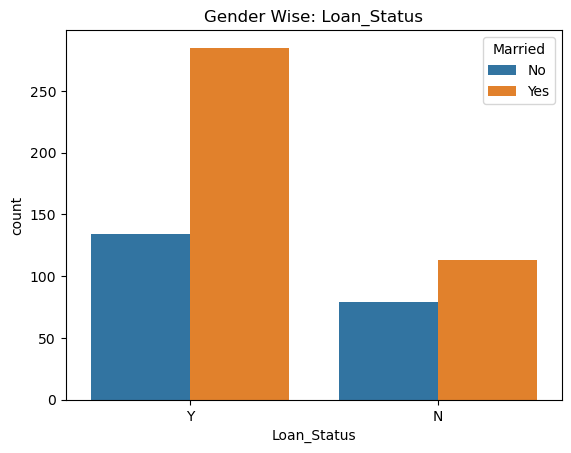

In [23]:
sns.countplot(x='Loan_Status', hue='Married', data=df)
plt.title('Marritial Status Wise: Loan_Status')
plt.show()

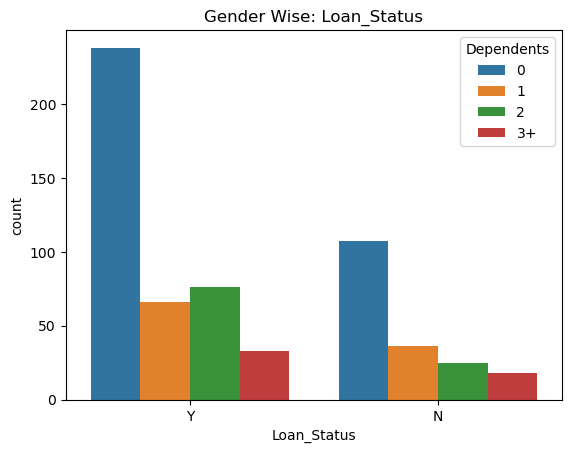

In [24]:
sns.countplot(x='Loan_Status', hue='Dependents', data=df)
plt.title('Dependents Wise: Loan_Status')
plt.show()

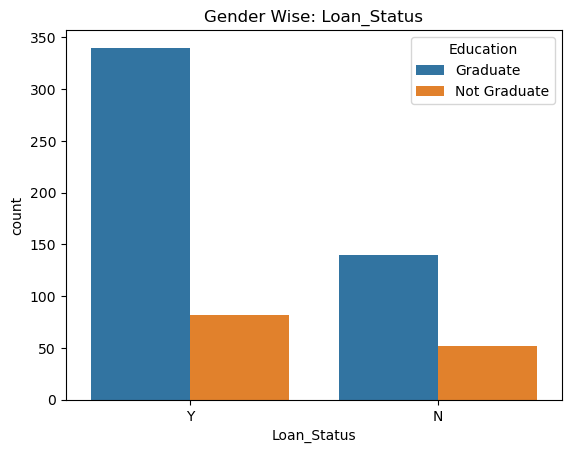

In [26]:
sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title('Gender Wise: Loan_Status')
plt.show()

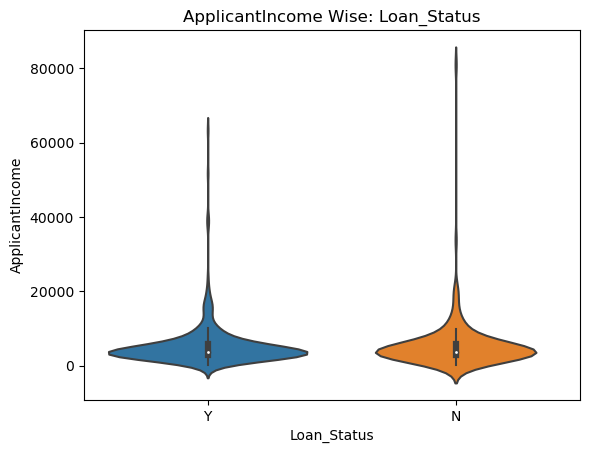

In [35]:
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('ApplicantIncome Wise: Loan_Status')
plt.show()


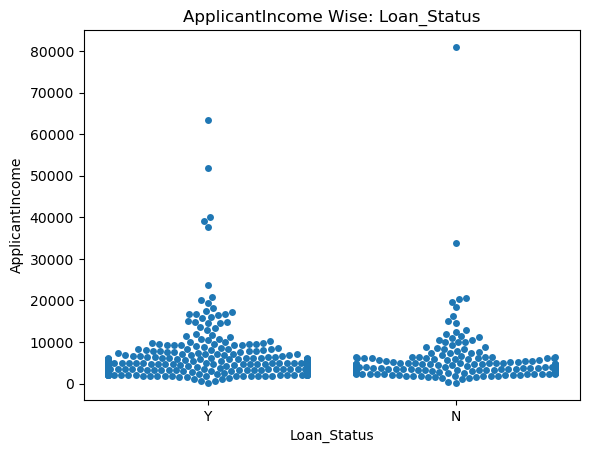

In [38]:
sns.swarmplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('ApplicantIncome Wise: Loan_Status')
plt.show()

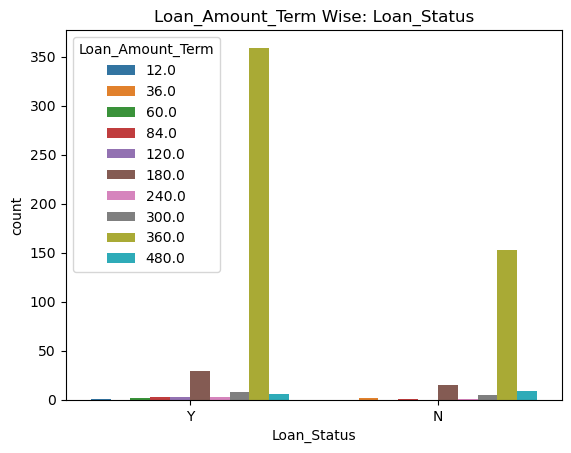

In [31]:
sns.countplot(x='Loan_Status', hue='Loan_Amount_Term', data=df)
plt.title('Loan_Amount_Term Wise: Loan_Status')
plt.show()

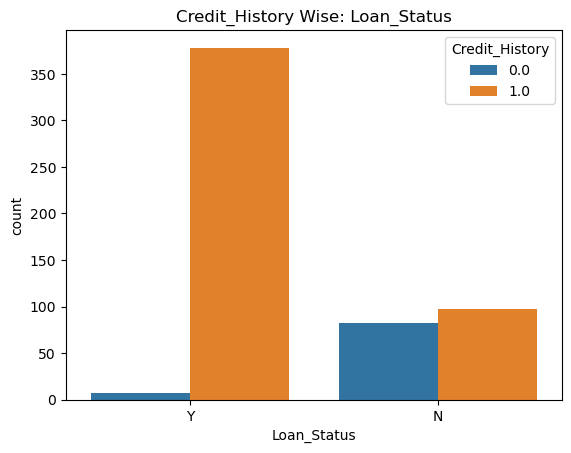

In [32]:
sns.countplot(x='Loan_Status', hue='Credit_History', data=df)
plt.title('Credit_History Wise: Loan_Status')
plt.show()

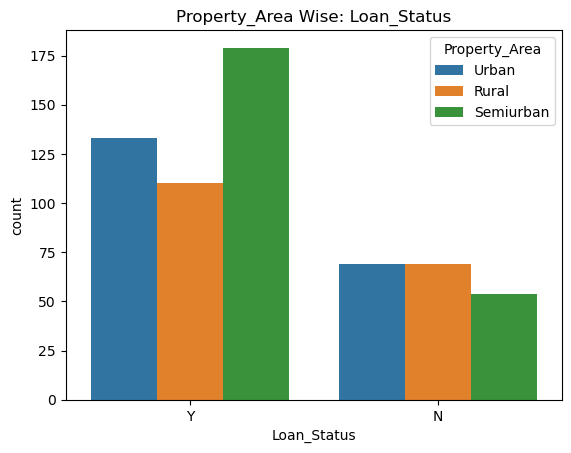

In [33]:
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)
plt.title('Property_Area Wise: Loan_Status')
plt.show()

In [39]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [40]:
df2=df1.copy()

In [43]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [46]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Specify the columns to encode
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply LabelEncoder to each specified column in the original DataFrame
df3[columns_to_encode] = df3[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Display the modified DataFrame
df3.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DROPPED: COLUMN Loan_ID</SPAN>

In [50]:
df3=df3.drop(['Loan_ID'],axis=1)
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [52]:
df3.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
df4=df3.copy()
df4

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLIT DATA: INDEPENDENT VARIABLE IN:  X</SPAN>

In [56]:
X=df3.drop(['Loan_Status'], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">TARGET VARIABLE:Y</SPAN>

In [57]:
Y=df3['Loan_Status']
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


             Variable        VIF
0              Gender   6.002051
1             Married   3.654179
2          Dependents   1.792095
3           Education   1.306879
4       Self_Employed   1.176596
5     ApplicantIncome   2.885856
6   CoapplicantIncome   1.482381
7          LoanAmount   6.772218
8    Loan_Amount_Term  10.310045
9      Credit_History   6.058999
10      Property_Area   2.574327


<span style="color:red;font-size: 15px;font-family: verdana;font-weight: bold ">Loan_Amount_Term  Has High VIF, we need to check its relationship with other Variables</span>

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">BIVARIATE ANALYSIS: LOAN AMOUNT TERM</SPAN>

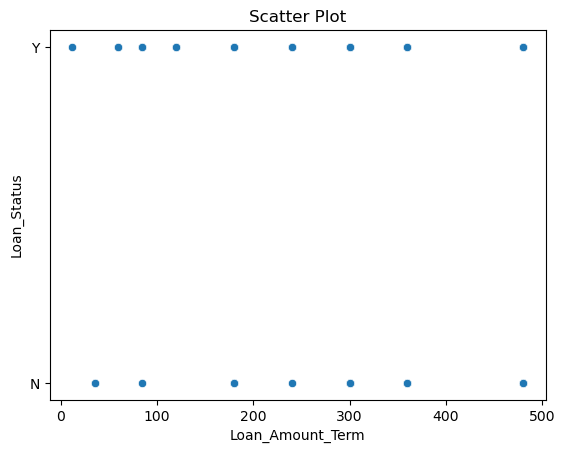

In [59]:
sns.scatterplot(x='Loan_Amount_Term', y='Loan_Status', data=df)
plt.title('Scatter Plot')
plt.show()


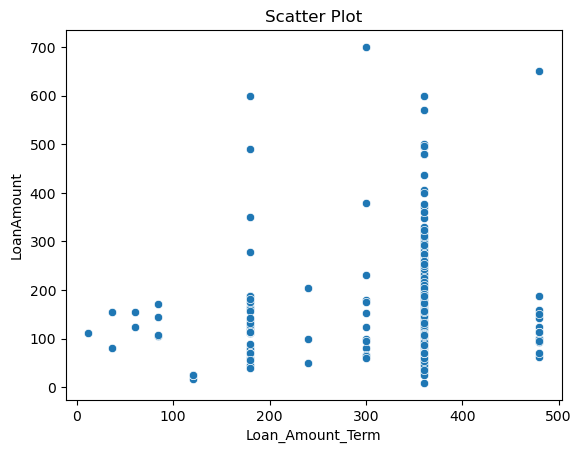

In [60]:
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data=df)
plt.title('Scatter Plot')
plt.show()


In [61]:
X=X.drop(['Loan_Amount_Term'], axis=1)

In [62]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,1.0,2


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING VIF AGAIN : AFTER REMOVAL OF 'Loan_Amount_Term' COLUMN </SPAN>

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

            Variable       VIF
0             Gender  5.423547
1            Married  3.648865
2         Dependents  1.790283
3          Education  1.275305
4      Self_Employed  1.175449
5    ApplicantIncome  2.874211
6  CoapplicantIncome  1.480185
7         LoanAmount  6.073786
8     Credit_History  4.441351
9      Property_Area  2.397276


<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: BOX PLOTS FOR Outliers</span>

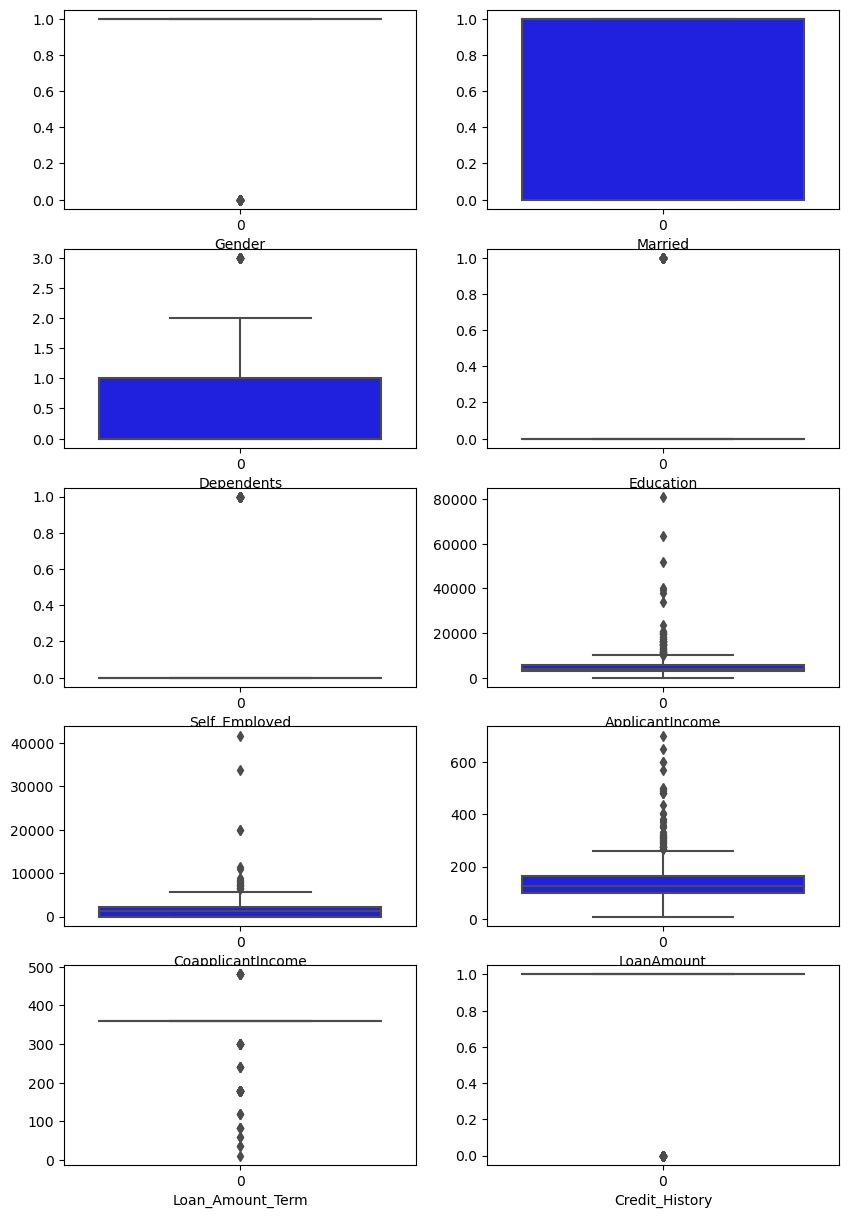

In [67]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df4.columns:
    if pltnum<11:
        plt.subplot(5,2, pltnum)
        sns.boxplot(df4[i], color='b')
        plt.xlabel(i)
    pltnum+=1
plt.show()

In [69]:
from scipy.stats import zscore

z_score=df4.apply(zscore)
z_score

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.302759,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.207648,0.273231,0.411733,-1.318513,-1.482537
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.944757,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.302759,0.273231,0.411733,1.223298,0.674519
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.053093,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.885313,0.273231,0.411733,-1.318513,0.674519
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.253868,-2.522836,0.411733,-1.318513,0.674519
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.278459,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.493794,0.273231,0.411733,1.223298,0.674519


In [70]:
outliers=(np.abs(z_score)>3).all(axis=1)
df4=df4[~outliers]
df4

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


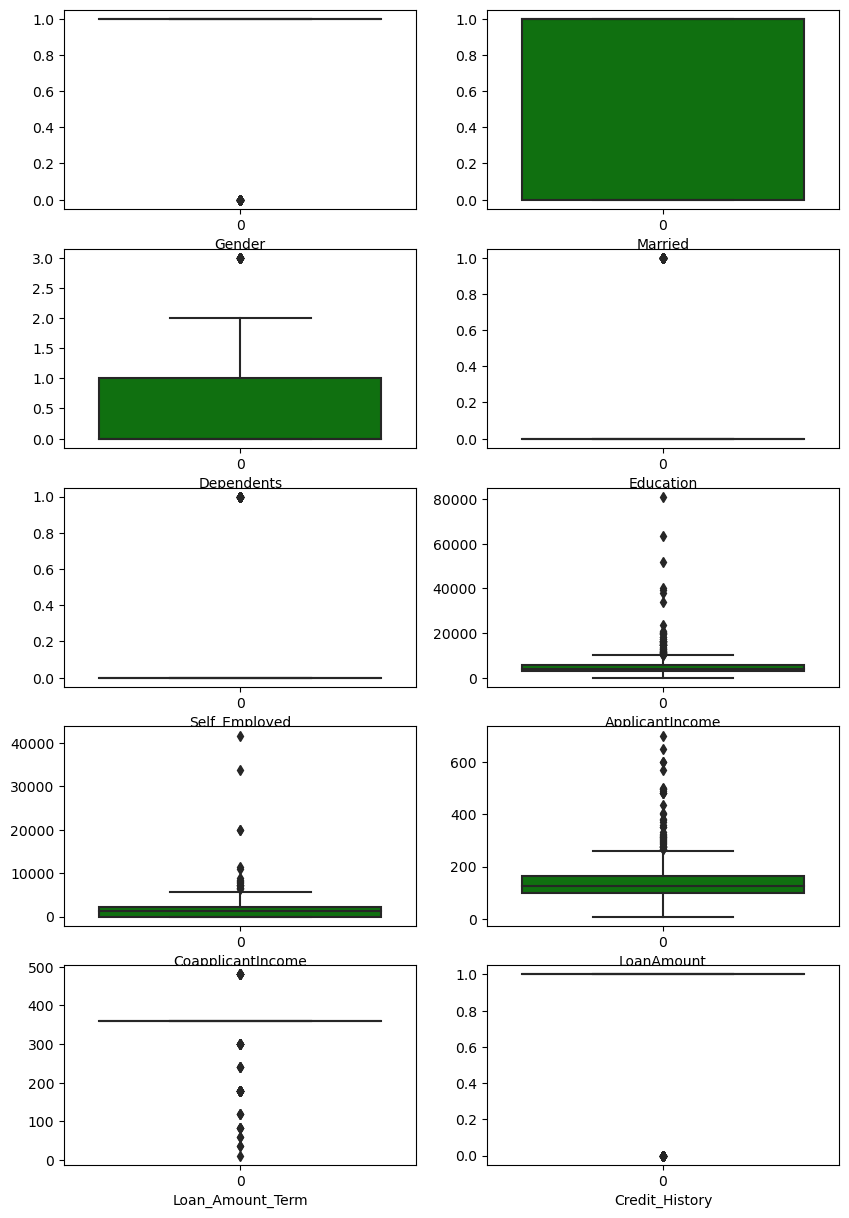

In [71]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df4.columns:
    if pltnum<11:
        plt.subplot(5,2, pltnum)
        sns.boxplot(df4[i], color='g')
        plt.xlabel(i)
    pltnum+=1
plt.show()

In [72]:
df4.shape

(614, 12)

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: DISTRIBUTION PLOTS FOR SKEWNESS</span>

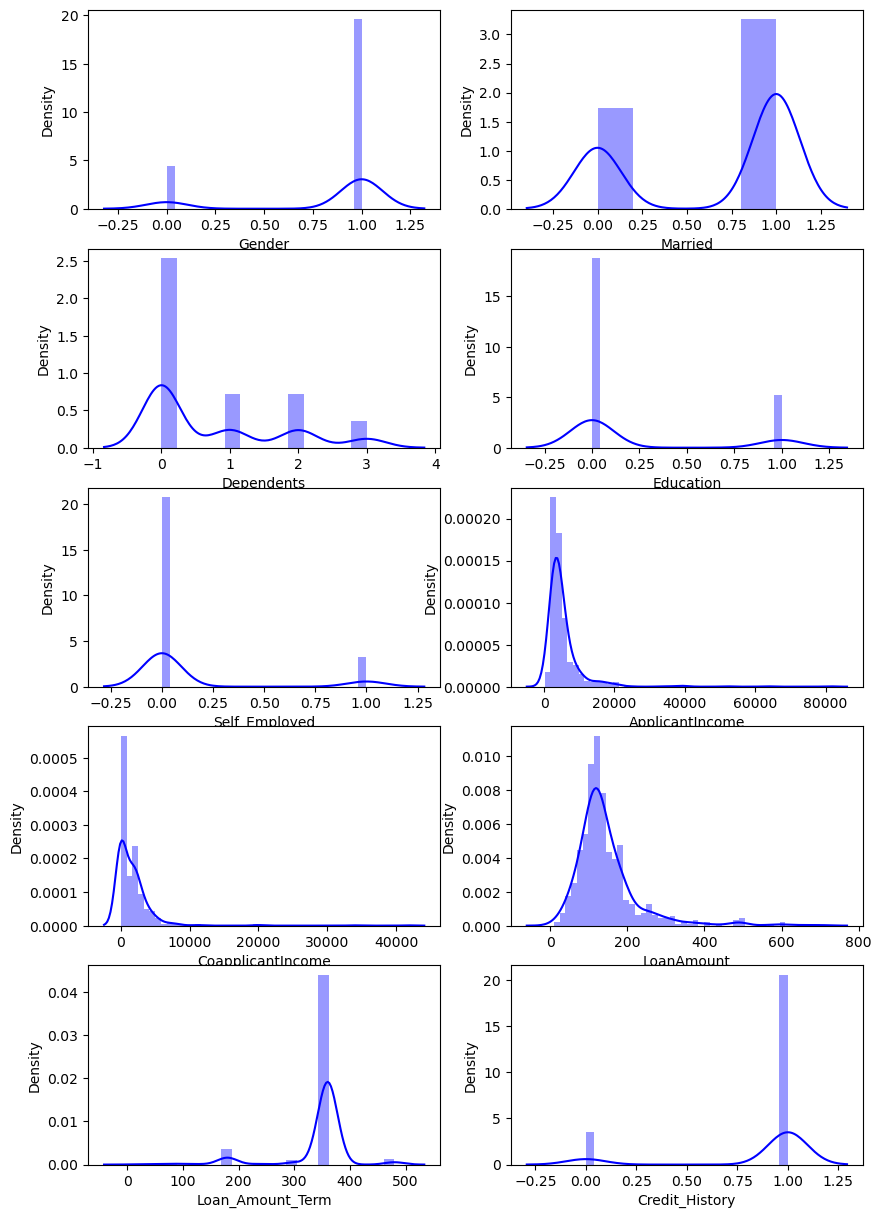

In [73]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df4.columns:
    if pltnum<11:
        plt.subplot(5,2, pltnum)
        sns.distplot(df4[i], color='b')
        plt.xlabel(i)
    pltnum+=1
plt.show()

In [74]:
df4.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [75]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 61.7 KB


In [81]:
df4.skew()

Gender               0.000000
Married              0.000000
Dependents                NaN
Education            0.000000
Self_Employed        0.000000
ApplicantIncome     -0.092513
CoapplicantIncome   -0.145537
LoanAmount           0.025121
Loan_Amount_Term     0.388552
Credit_History       0.000000
Property_Area       -0.066196
Loan_Status          0.000000
dtype: float64

<span style="color:green;font-size: 15px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=43)

In [83]:
X_train.shape

(429, 10)

In [84]:
X_test.shape

(185, 10)

In [85]:
Y_train.shape

(429,)

In [86]:
Y_test.shape

(185,)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">MODEL IMPORT</span>

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE</span>

In [88]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_report = accuracy_score(Y_test, pred)
    
    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i

    # Print accuracy for each random state
    print("Accuracy Score at Random State", i, "is", acc_report)

# Print the maximum accuracy and corresponding random state
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)


Accuracy Score at Random State 1 is 0.7945945945945946
Accuracy Score at Random State 2 is 0.7837837837837838
Accuracy Score at Random State 3 is 0.8432432432432433
Accuracy Score at Random State 4 is 0.7945945945945946
Accuracy Score at Random State 5 is 0.8378378378378378
Accuracy Score at Random State 6 is 0.8054054054054054
Accuracy Score at Random State 7 is 0.8054054054054054
Accuracy Score at Random State 8 is 0.8432432432432433
Accuracy Score at Random State 9 is 0.772972972972973
Accuracy Score at Random State 10 is 0.8
Accuracy Score at Random State 11 is 0.7891891891891892
Accuracy Score at Random State 12 is 0.8108108108108109
Accuracy Score at Random State 13 is 0.8540540540540541
Accuracy Score at Random State 14 is 0.7945945945945946
Accuracy Score at Random State 15 is 0.8
Accuracy Score at Random State 16 is 0.7837837837837838
Accuracy Score at Random State 17 is 0.7837837837837838
Accuracy Score at Random State 18 is 0.7945945945945946
Accuracy Score at Random State 1

Accuracy Score at Random State 151 is 0.8162162162162162
Accuracy Score at Random State 152 is 0.772972972972973
Accuracy Score at Random State 153 is 0.7783783783783784
Accuracy Score at Random State 154 is 0.827027027027027
Accuracy Score at Random State 155 is 0.8324324324324325
Accuracy Score at Random State 156 is 0.8216216216216217
Accuracy Score at Random State 157 is 0.7837837837837838
Accuracy Score at Random State 158 is 0.8540540540540541
Accuracy Score at Random State 159 is 0.7567567567567568
Accuracy Score at Random State 160 is 0.8108108108108109
Accuracy Score at Random State 161 is 0.8540540540540541
Accuracy Score at Random State 162 is 0.7837837837837838
Accuracy Score at Random State 163 is 0.8
Accuracy Score at Random State 164 is 0.8594594594594595
Accuracy Score at Random State 165 is 0.8108108108108109
Accuracy Score at Random State 166 is 0.8216216216216217
Accuracy Score at Random State 167 is 0.7891891891891892
Accuracy Score at Random State 168 is 0.76756756

Accuracy Score at Random State 299 is 0.8
Maximum Accuracy Score is 0.8648648648648649 at Random State 205


<span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">Maximum Accuracy Score is 0.8648648648648649 at Random State 205
</span>

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOGISTIC REGRESSION</SPAN>


In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=205)

lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8648648648648649
Confusion Matrix  [[ 20   3]
 [ 22 140]]
Classfication Reports                precision    recall  f1-score   support

           0       0.48      0.87      0.62        23
           1       0.98      0.86      0.92       162

    accuracy                           0.86       185
   macro avg       0.73      0.87      0.77       185
weighted avg       0.92      0.86      0.88       185



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DECESSION TREE CLASSIFIER</SPAN>

In [90]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.7189189189189189
Confusion Matrix  [[ 21  31]
 [ 21 112]]
Classfication Reports                precision    recall  f1-score   support

           0       0.50      0.40      0.45        52
           1       0.78      0.84      0.81       133

    accuracy                           0.72       185
   macro avg       0.64      0.62      0.63       185
weighted avg       0.70      0.72      0.71       185



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">K Neighbors Classifier</SPAN>


In [91]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.6918918918918919
Confusion Matrix  [[  9  24]
 [ 33 119]]
Classfication Reports                precision    recall  f1-score   support

           0       0.21      0.27      0.24        33
           1       0.83      0.78      0.81       152

    accuracy                           0.69       185
   macro avg       0.52      0.53      0.52       185
weighted avg       0.72      0.69      0.71       185



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Classifier</SPAN>

In [92]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8216216216216217
Confusion Matrix  [[ 19  10]
 [ 23 133]]
Classfication Reports                precision    recall  f1-score   support

           0       0.45      0.66      0.54        29
           1       0.93      0.85      0.89       156

    accuracy                           0.82       185
   macro avg       0.69      0.75      0.71       185
weighted avg       0.86      0.82      0.83       185



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Ada Boost Classifier</SPAN>


In [93]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8378378378378378
Confusion Matrix  [[ 18   6]
 [ 24 137]]
Classfication Reports                precision    recall  f1-score   support

           0       0.43      0.75      0.55        24
           1       0.96      0.85      0.90       161

    accuracy                           0.84       185
   macro avg       0.69      0.80      0.72       185
weighted avg       0.89      0.84      0.86       185



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boosting Classifier</SPAN>

In [94]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8432432432432433
Confusion Matrix  [[ 18   5]
 [ 24 138]]
Classfication Reports                precision    recall  f1-score   support

           0       0.43      0.78      0.55        23
           1       0.97      0.85      0.90       162

    accuracy                           0.84       185
   macro avg       0.70      0.82      0.73       185
weighted avg       0.90      0.84      0.86       185



<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH LOGISTIC REGRESSION</SPAN>

In [95]:
from sklearn.model_selection import cross_val_score
cv_score1=cross_val_score(lr,X ,Y, cv=5)
print("Cross Validation score is", cv_score1)
print("Mean of Cross Validation score is", cv_score1.mean())
print("Standard Deviation of Cross Validation score is", cv_score1.std())

Cross Validation score is [0.81300813 0.76422764 0.7804878  0.85365854 0.79508197]
Mean of Cross Validation score is 0.8012928162068504
Standard Deviation of Cross Validation score is 0.03073977068894677


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH DTC</SPAN>

In [96]:
cv_score2=cross_val_score(dtc,X ,Y, cv=5)
print("Cross Validation score is", cv_score2)
print("Mean of Cross Validation score is", cv_score2.mean())
print("Standard Deviation of Cross Validation score is", cv_score2.std())

Cross Validation score is [0.68292683 0.71544715 0.70731707 0.78861789 0.72131148]
Mean of Cross Validation score is 0.7231240836998534
Standard Deviation of Cross Validation score is 0.035262841065496264


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH KNEIGHBOUR CLASSIFIER</SPAN>

In [97]:
cv_score3=cross_val_score(knn,X ,Y, cv=5)
print("Cross Validation score is", cv_score3)
print("Mean of Cross Validation score is", cv_score3.mean())
print("Standard Deviation of Cross Validation score is", cv_score3.std())

Cross Validation score is [0.63414634 0.60162602 0.64227642 0.59349593 0.6147541 ]
Mean of Cross Validation score is 0.617259762761562
Standard Deviation of Cross Validation score is 0.018581720660455665


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH RANDOM FOREST CLASSIFIER</SPAN>

In [98]:
cv_score4=cross_val_score(rfc,X ,Y, cv=5)
print("Cross Validation score is", cv_score4)
print("Mean of Cross Validation score is", cv_score4.mean())
print("Standard Deviation of Cross Validation score is", cv_score4.std())

Cross Validation score is [0.78861789 0.77235772 0.79674797 0.79674797 0.78688525]
Mean of Cross Validation score is 0.7882713581234173
Standard Deviation of Cross Validation score is 0.008932983439044086


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH ADABOOST CLASSIFIER</SPAN>


In [99]:
cv_score5=cross_val_score(abc,X ,Y, cv=5)
print("Cross Validation score is", cv_score5)
print("Mean of Cross Validation score is", cv_score5.mean())
print("Standard Deviation of Cross Validation score is", cv_score5.std())

Cross Validation score is [0.78861789 0.77235772 0.78861789 0.82113821 0.81147541]
Mean of Cross Validation score is 0.7964414234306278
Standard Deviation of Cross Validation score is 0.017540764813698248


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH GRADIENT BOOST CLASSIFIER</SPAN>

In [100]:
cv_score6=cross_val_score(gbc,X ,Y, cv=5)
print("Cross Validation score is", cv_score6)
print("Mean of Cross Validation score is", cv_score6.mean())
print("Standard Deviation of Cross Validation score is", cv_score6.std())

Cross Validation score is [0.77235772 0.7398374  0.7804878  0.82113821 0.81967213]
Mean of Cross Validation score is 0.7866986538717847
Standard Deviation of Cross Validation score is 0.030703574772095725


<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">Based on the calculated cross-validation results, mean cross-validation scores, and standard deviations, here we have observed that LOGISTIC REGRESSION has good Cross Validation Score </SPAN>

<span style="color:Blue;font-size: 25px;font-family: verdana;font-weight: bold ">HYPER PARAMETER TUNING</SPAN>
​

<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=205)

# Create Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid to search through
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy on Test Set: 0.8648648648648649


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [105]:
lr = LogisticRegression(C= 1, penalty= 'l2')
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))


Accuracy Score  0.8648648648648649
Confusion Matrix  [[ 20   3]
 [ 22 140]]
Classfication Reports                precision    recall  f1-score   support

           0       0.48      0.87      0.62        23
           1       0.98      0.86      0.92       162

    accuracy                           0.86       185
   macro avg       0.73      0.87      0.77       185
weighted avg       0.92      0.86      0.88       185



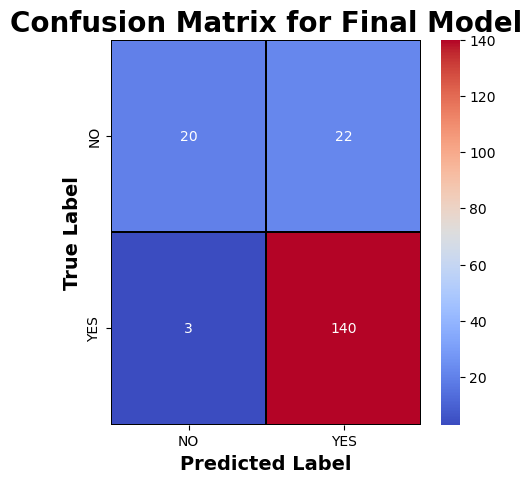

In [106]:
Matrix = confusion_matrix(Y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

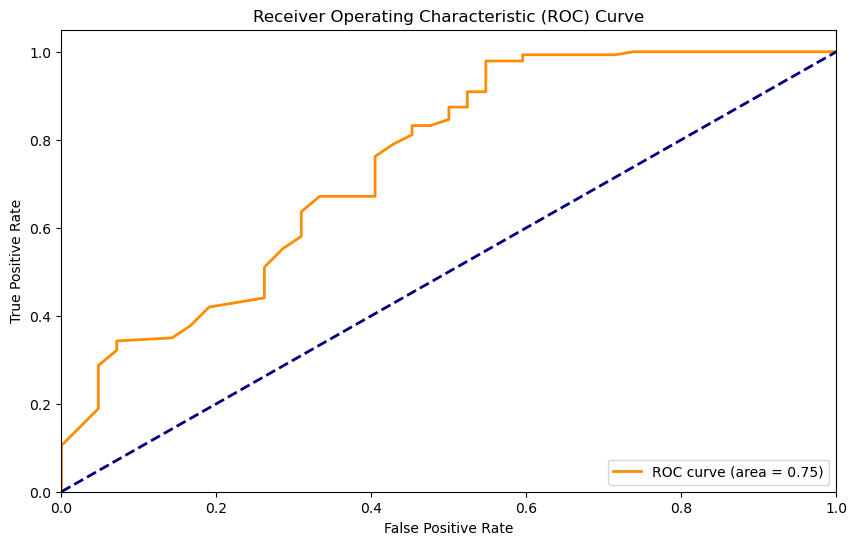

In [107]:
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) from your model
y_probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>

In [108]:
import joblib
joblib.dump(lr,'loan_application.pkl')

['loan_application.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [109]:
prediction = lr.predict(X_test)


In [110]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(5)

,Predicted Values,Actual Values
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
